#ライブラリをインポート

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

# 自作関数のインポート

In [3]:
from dataset import Create_dataset
#from AE import Encoder_AE, Decoder_AE, AE, criterion_AE
#from VAE import Encoder_VAE, Decoder_VAE, VAE, criterion_VAE
from lerning_AE import Learning_AE
from lerning_VAE import Learning_VAE

# パラメータ

In [4]:
#バッチサイズを指定
BATCH_SIZE = 100
#訓練データと試験データの比率
train_rate=0.8# 8割を訓練
#->test_rate=0.2# 2割をテスト
#学習のエポック数
num_epochs = 20


In [5]:
train_loader, val_loader = Create_dataset(BATCH_SIZE, train_rate)

100%|██████████| 9912422/9912422 [00:00<00:00, 291087322.91it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 8996338.20it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 122305581.24it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 6862582.41it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



##############################
<dataset information>
	train data size:  48000
	train iteration number:  480
	val data size:  12000
	val iteration number:  120
##############################




In [6]:
#変数定義
z_dim = 2 #潜在変数の次元数
#学習
print("\n<Start to learn by AE>")
history_AE=Learning_AE(z_dim, num_epochs, train_loader,val_loader)
print("\n<Start to learn by VAE>")
history_VAE=Learning_VAE(z_dim, num_epochs, train_loader,val_loader)
#履歴の保存
with open('history_AE.pkl', 'wb') as f:
	pickle.dump(history_AE, f)
with open('history_VAE.pkl', 'wb') as f:
	pickle.dump(history_VAE, f)



<Start to learn by AE>
Epoch: 1, val_loss:  17793.9648
Epoch: 2, val_loss:  15360.3057
Epoch: 3, val_loss:  15338.0449
Epoch: 4, val_loss:  14712.7949
Epoch: 5, val_loss:  13807.6934

<Start to learn by AAE>
Epoch: 1, val_loss:  16896.1895
Epoch: 2, val_loss:  15483.7070
Epoch: 3, val_loss:  15227.0625
Epoch: 4, val_loss:  15023.9775
Epoch: 5, val_loss:  15384.7070


In [13]:
import pickle
#import torch
#map_location=torch.device('cpu')
with open('history_AE.pkl', 'rb') as f:
	history_AE = pickle.load(f)
with open('history_VAE.pkl', 'rb') as f:
	history_VAE = pickle.load(f)

Text(0.0, 1.0, 'VAE_Test')

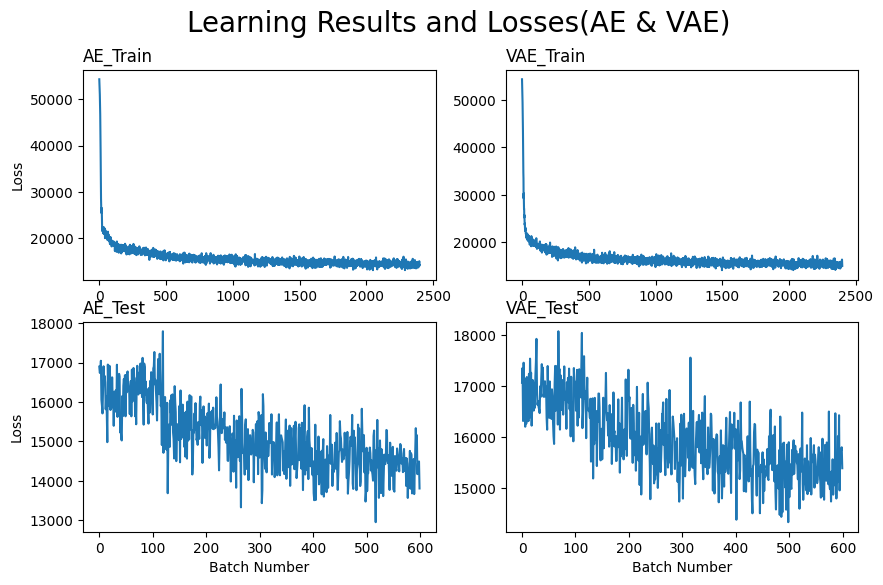

In [14]:
fig = plt.figure(figsize=(10,6))
plt.suptitle('Learning Results and Losses(AE & VAE)',fontsize=20)

train_loss_tensor = torch.stack(history_AE["train_loss"])
train_loss_np = train_loss_tensor.to('cpu').detach().numpy().copy()
ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(train_loss_np)
ax1.set_ylabel("Loss")
ax1.set_title("AE_Train", loc='left')

val_loss_tensor = torch.stack(history_AE["val_loss"])
val_loss_np = val_loss_tensor.to('cpu').detach().numpy().copy()
ax2 = fig.add_subplot(2, 2, 3)
ax2.plot(val_loss_np)
ax2.set_ylabel("Loss")
ax2.set_xlabel("Batch Number")
ax2.set_title("AE_Test", loc='left')

train_loss_tensor = torch.stack(history_VAE["train_loss"])
train_loss_np = train_loss_tensor.to('cpu').detach().numpy().copy()
ax3 = fig.add_subplot(2, 2, 2)
ax3.plot(train_loss_np)
#ax3.set_ylabel("Loss")
ax3.set_title("VAE_Train", loc='left')

val_loss_tensor = torch.stack(history_VAE["val_loss"])
val_loss_np = val_loss_tensor.to('cpu').detach().numpy().copy()
ax4 = fig.add_subplot(2, 2, 4)
ax4.plot(val_loss_np)
#ax4.set_ylabel("Loss")
ax4.set_xlabel("Batch Number")
ax4.set_title("VAE_Test", loc='left')

### historyから潜在変数とラベルを取得

### AE

In [15]:
z_tensor_AE = torch.stack(history_AE["z"])
labels_tensor_AE = torch.stack(history_AE["labels"])
print(z_tensor_AE.size())   #torch.Size([9600, 100, 2])
print(labels_tensor_AE.size())   #torch.Size([9600, 100])

z_np_AE = z_tensor_AE.to('cpu').detach().numpy().copy()
labels_np_AE = labels_tensor_AE.to('cpu').detach().numpy().copy()
print(z_np_AE.shape)   #(9600, 100, 2)
print(labels_np_AE.shape)   #(9600, 100)

torch.Size([2400, 100, 2])
torch.Size([2400, 100])
(2400, 100, 2)
(2400, 100)


### VAE

In [16]:
ave_tensor_VAE = torch.stack(history_VAE["ave"])
log_var_tensor_VAE = torch.stack(history_VAE["log_dev"])
z_tensor_VAE = torch.stack(history_VAE["z"])
labels_tensor_VAE = torch.stack(history_VAE["labels"])
print(ave_tensor_VAE.size())   #torch.Size([9600, 100, 2])
print(log_var_tensor_VAE.size())   #torch.Size([9600, 100, 2])
print(z_tensor_VAE.size())   #torch.Size([9600, 100, 2])
print(labels_tensor_VAE.size())   #torch.Size([9600, 100])

ave_np_VAE = ave_tensor_VAE.to('cpu').detach().numpy().copy()
log_var_np_VAE = log_var_tensor_VAE.to('cpu').detach().numpy().copy()
z_np_VAE = z_tensor_VAE.to('cpu').detach().numpy().copy()
labels_np_VAE = labels_tensor_VAE.to('cpu').detach().numpy().copy()
print(ave_np_VAE.shape)   #(9600, 100, 2)
print(log_var_np_VAE.shape)   #(9600, 100, 2)
print(z_np_VAE.shape)   #(9600, 100, 2)
print(labels_np_VAE.shape)   #(9600, 100)

torch.Size([2400, 100, 2])
torch.Size([2400, 100, 2])
torch.Size([2400, 100, 2])
torch.Size([2400, 100])
(2400, 100, 2)
(2400, 100, 2)
(2400, 100, 2)
(2400, 100)


###潜在変数空間

## 学習序盤

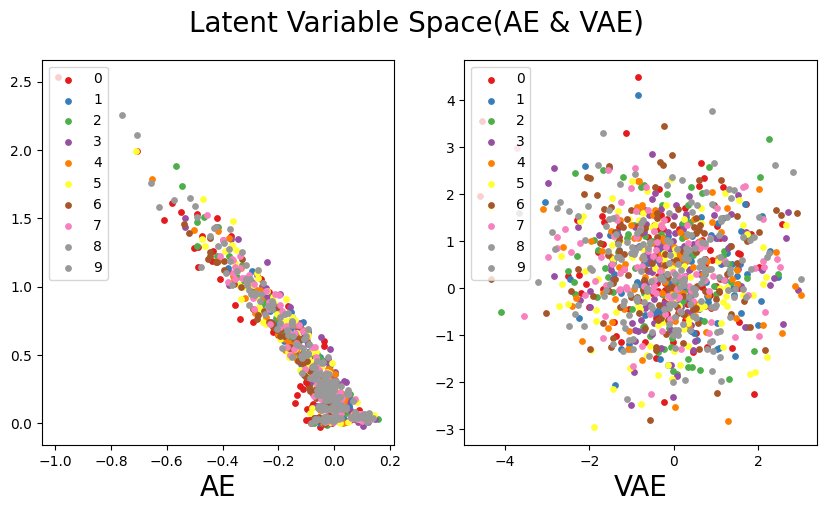

In [17]:
#グラフの色の指定
map_keyword = "Set1"
cmap = plt.get_cmap(map_keyword)

#表示するバッチ番号の指定
batch_num =10

#グラフの設定
fig=plt.figure(figsize=[10,5])
plt.suptitle('Latent Variable Space(AE & VAE)',fontsize=20)

train_loss_tensor = torch.stack(history_AE["train_loss"])
train_loss_np = train_loss_tensor.to('cpu').detach().numpy().copy()
ax1 = fig.add_subplot(1, 2, 1)
for label in range(10):
  x = z_np_AE[:batch_num,:,0][labels_np_AE[:batch_num,:] == label]
  y = z_np_AE[:batch_num,:,1][labels_np_AE[:batch_num,:] == label]
  ax1.scatter(x, y, color=cmap(label/9), label=label, s=15)
  #ax1.annotate(label, xy=(np.mean(x),np.mean(y)),size=20,color="black")
  ax1.set_xlabel("AE",fontsize=20)
ax1.legend(loc="upper left")
ax2 = fig.add_subplot(1, 2, 2)
for label in range(10):
  x = z_np_VAE[:batch_num,:,0][labels_np_VAE[:batch_num,:] == label]
  y = z_np_VAE[:batch_num,:,1][labels_np_VAE[:batch_num,:] == label]
  ax2.scatter(x, y, color=cmap(label/9), label=label, s=15)
  #ax2.annotate(label, xy=(np.mean(x),np.mean(y)),size=20,color="black")
  ax2.set_xlabel("VAE",fontsize=20)
ax2.legend(loc="upper left")
plt.show()
plt.close()

## 学習終盤

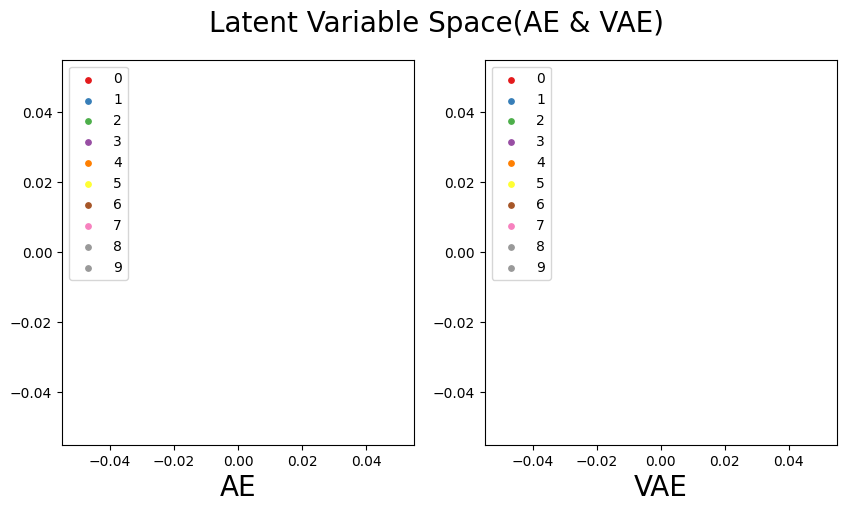

In [18]:
#グラフの色の指定
map_keyword = "Set1"
cmap = plt.get_cmap(map_keyword)

#表示するバッチ番号の指定
batch_num = 9580

#グラフの設定
fig=plt.figure(figsize=[10,5])
plt.suptitle('Latent Variable Space(AE & VAE)',fontsize=20)

#train_loss_tensor = torch.stack(history_AE["train_loss"])
#train_loss_np = train_loss_tensor.to('cpu').detach().numpy().copy()
ax1 = fig.add_subplot(1, 2, 1)
for label in range(10):
  x = z_np_AE[batch_num:,:,0][labels_np_AE[batch_num:,:] == label]
  y = z_np_AE[batch_num:,:,1][labels_np_AE[batch_num:,:] == label]
  ax1.scatter(x, y, color=cmap(label/9), label=label, s=15)
  ax1.set_xlabel("AE",fontsize=20)
  #ax1.annotate(label, xy=(np.mean(x),np.mean(y)),size=20,color="black")
ax1.legend(loc="upper left")
ax2 = fig.add_subplot(1, 2, 2)
for label in range(10):
  x = z_np_VAE[batch_num:,:,0][labels_np_VAE[batch_num:,:] == label]
  y = z_np_VAE[batch_num:,:,1][labels_np_VAE[batch_num:,:] == label]
  ax2.scatter(x, y, color=cmap(label/9), label=label, s=15)
  ax2.set_xlabel("VAE",fontsize=20)
  #ax2.annotate(label, xy=(np.mean(x),np.mean(y)),size=20,color="black")
ax2.legend(loc="upper left")
plt.show()
plt.close()